# Sonar Machine Learning Project
## Dataset: 
https://archive.ics.uci.edu/dataset/151/connectionist+bench+sonar+mines+vs+rocks

## Info on Dataset:
https://machinelearningmastery.com/standard-machine-learning-datasets/

# Introduction / Background Information

The dataset provides information from sonars of an object from 60 different angles to determine whether it's a rock or a mine. This dataset can be used to train a machine learning program to identify the object. The ability to increase the precision of the machine learning model would increase the chances of success of correctly identifying the object. Object identification can be found throughout our current world with very practical uses. If we add an autonomous method of doing this 24/7 without human assistance we could decrease human error. Examples of such scenarios are self-driving cars and military uses such as identifying missiles and submarines.

## What is a binary (2-class) classification problem?

A binary (2-class) classification problem is a problem in which there are only two possible outcomes. An example of this in the real world is the spam identification we find in our emails. Wonder why sometimes your mail goes into spam? It goes through an algorithm that checks for specific keywords that can be used to identify spam. This algorithm spits out only two possible outcomes, spam or no spam.

## Notebook Setup

In [178]:
# Third-party imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

#Model Imports

#import used for tuning hyperparameters
from sklearn.model_selection import GridSearchCV
#import used for splitting the data
from sklearn.model_selection import train_test_split
#import logistic regression model
from sklearn.linear_model import LogisticRegression
#import the decision tree model
from sklearn.tree import DecisionTreeClassifier
#import random forest model
from sklearn.ensemble import RandomForestClassifier
#import support vector machine model
from sklearn.svm import SVC
#import k nearest neighbors model
from sklearn.neighbors import KNeighborsClassifier

In [179]:
#loads seaborns default settings
sns.set()

## Load data
Let's load the sonar dataset using pandas

In [180]:
#creates a variable df
#inputs dataset into df
df = pd.read_csv('sonar.csv')

In [181]:
#renames the column with the target values to "target"
df = df.rename({'R': 'target'}, axis=1)

# Data Exploration

In [182]:
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,target
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [183]:
df.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0200  207 non-null    float64
 1   0.0371  207 non-null    float64
 2   0.0428  207 non-null    float64
 3   0.0207  207 non-null    float64
 4   0.0954  207 non-null    float64
 5   0.0986  207 non-null    float64
 6   0.1539  207 non-null    float64
 7   0.1601  207 non-null    float64
 8   0.3109  207 non-null    float64
 9   0.2111  207 non-null    float64
 10  0.1609  207 non-null    float64
 11  0.1582  207 non-null    float64
 12  0.2238  207 non-null    float64
 13  0.0645  207 non-null    float64
 14  0.0660  207 non-null    float64
 15  0.2273  207 non-null    float64
 16  0.3100  207 non-null    float64
 17  0.2999  207 non-null    float64
 18  0.5078  207 non-null    float64
 19  0.4797  207 non-null    float64
 20  0.5783  207 non-null    float64
 21  0.5071  207 non-null    float64
 22  0.

## What is an imbalanced dataset?

It is when there is more data for one class than another. We can see that there are more data on mines compared to rocks which means that the program will be more prepared for a mine rather than a rock during testing. Below is an example of an imbalance dataset.

![Imbalance](https://miro.medium.com/v2/resize:fit:450/1*zsyN08VVrgHbAEdvv27Pyw.png)

In [185]:
#creates a variable occurence_unique
#displays the number of each unique values occurence
occurence_unique = df['target'].value_counts()
occurence_unique

target
M    111
R     96
Name: count, dtype: int64

<Axes: title={'center': 'Count (target)'}, xlabel='target'>

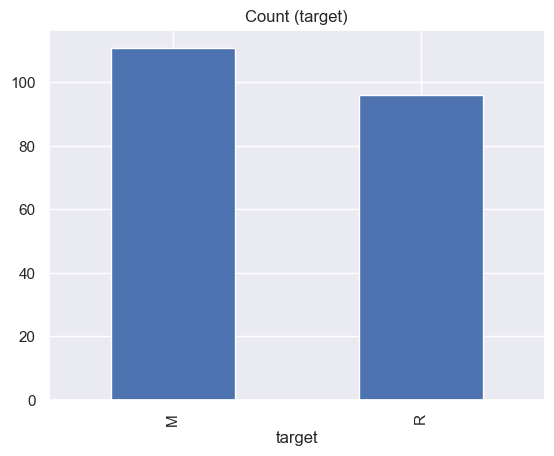

In [186]:
#creates a visual that displays the imbalance in data (bar)
occurence_unique.plot(kind='bar', title='Count (target)')

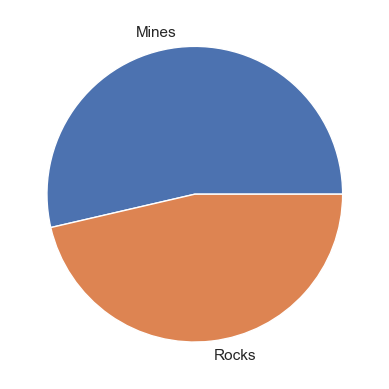

In [187]:
#creates a visual that displays the imbalance in data (pie chart)
fig, ax = plt.subplots()
ax.pie(occurence_unique, labels=["Mines", "Rocks"])
plt.show()

# Train test split
You always want to evaluate your final model on a test set that hasn't been used at all in the training proccess. So we'll split off a test set here. We decide to use 20% as it is standard advice for all test sets for machine learning.

![TESTSPLIT](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_train-test-split_0.jpg)

In [188]:
#creates two variables df_train and df_test
#puts 80% of the dataset into df_train
#puts 20% of the dataset into df_test
df_train, df_test = train_test_split(df, test_size=0.20, random_state=10)

In [189]:
#check to make sure the data was split correctly
df_train.shape

(165, 61)

In [190]:
#check to make sure the data was split correctly
df_test.shape

(42, 61)

In [191]:
#check to make sure the data was split correctly
df_train.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,target
181,0.0095,0.0308,0.0539,0.0411,0.0613,0.1039,0.1016,0.1394,0.2592,0.3745,...,0.0181,0.0019,0.0102,0.0133,0.0040,0.0042,0.0030,0.0031,0.0033,M
52,0.0293,0.0378,0.0257,0.0062,0.0130,0.0612,0.0895,0.1107,0.0973,0.0751,...,0.0065,0.0072,0.0108,0.0051,0.0102,0.0041,0.0055,0.0050,0.0087,R
99,0.0629,0.1065,0.1526,0.1229,0.1437,0.1190,0.0884,0.0907,0.2107,0.3597,...,0.0089,0.0262,0.0108,0.0138,0.0187,0.0230,0.0057,0.0113,0.0131,M
98,0.0201,0.0423,0.0554,0.0783,0.0620,0.0871,0.1201,0.2707,0.1206,0.0279,...,0.0191,0.0182,0.0160,0.0290,0.0090,0.0242,0.0224,0.0190,0.0096,M
47,0.0190,0.0038,0.0642,0.0452,0.0333,0.0690,0.0901,0.1454,0.0740,0.0349,...,0.0093,0.0118,0.0112,0.0094,0.0140,0.0072,0.0022,0.0055,0.0122,R


# Prepare our data for modeling
This involves spitting the data back out into plain NumPy arrays

In [192]:
#creates two variables x_train and y_train
#x_train contains all columns excluding the target column
#y_train only the target column
x_train = df_train.drop(columns=['target']).values
y_train = df_train['target'].values

In [193]:
#creates four variables xt, xv, yt, yv
#xt stands for "x_train", and xv stands for "x_validation"
#75% of the training data goes into xt and yt while 25% of the training data goes into xv and yv
xt, xv, yt, yv = train_test_split(x_train, y_train, test_size=0.25)

In [194]:
#creates a x_test and y_test variable
#x_test stores all the columns besides the target column from the df_test dataframe
#y_test stores the target column from the df_test dataframe
x_test = df_test.drop(columns=['target']).values
y_test = df_test['target'].values

# Modeling - Logistic Regression

We know that all the data being used by the model to come up with a prediction is numerical. Knowing this we can use a variety of different models, such as: logistic regression, decision trees, random forest, support vector machines, and k-nearest neighbors.

## What is a logistic regression model?
Logistic regression allows you to take in multiple inputs and spits out the probability of being one class or the other. This is very useful when it's only two classes as it can either be one or the other (0 or 1). The area between 0 and 1 is where the machine is uncertain if it's one or the other but it will give you the answer with the highest probability.

Documentation: https://en.wikipedia.org/wiki/Logistic_regression

Image:

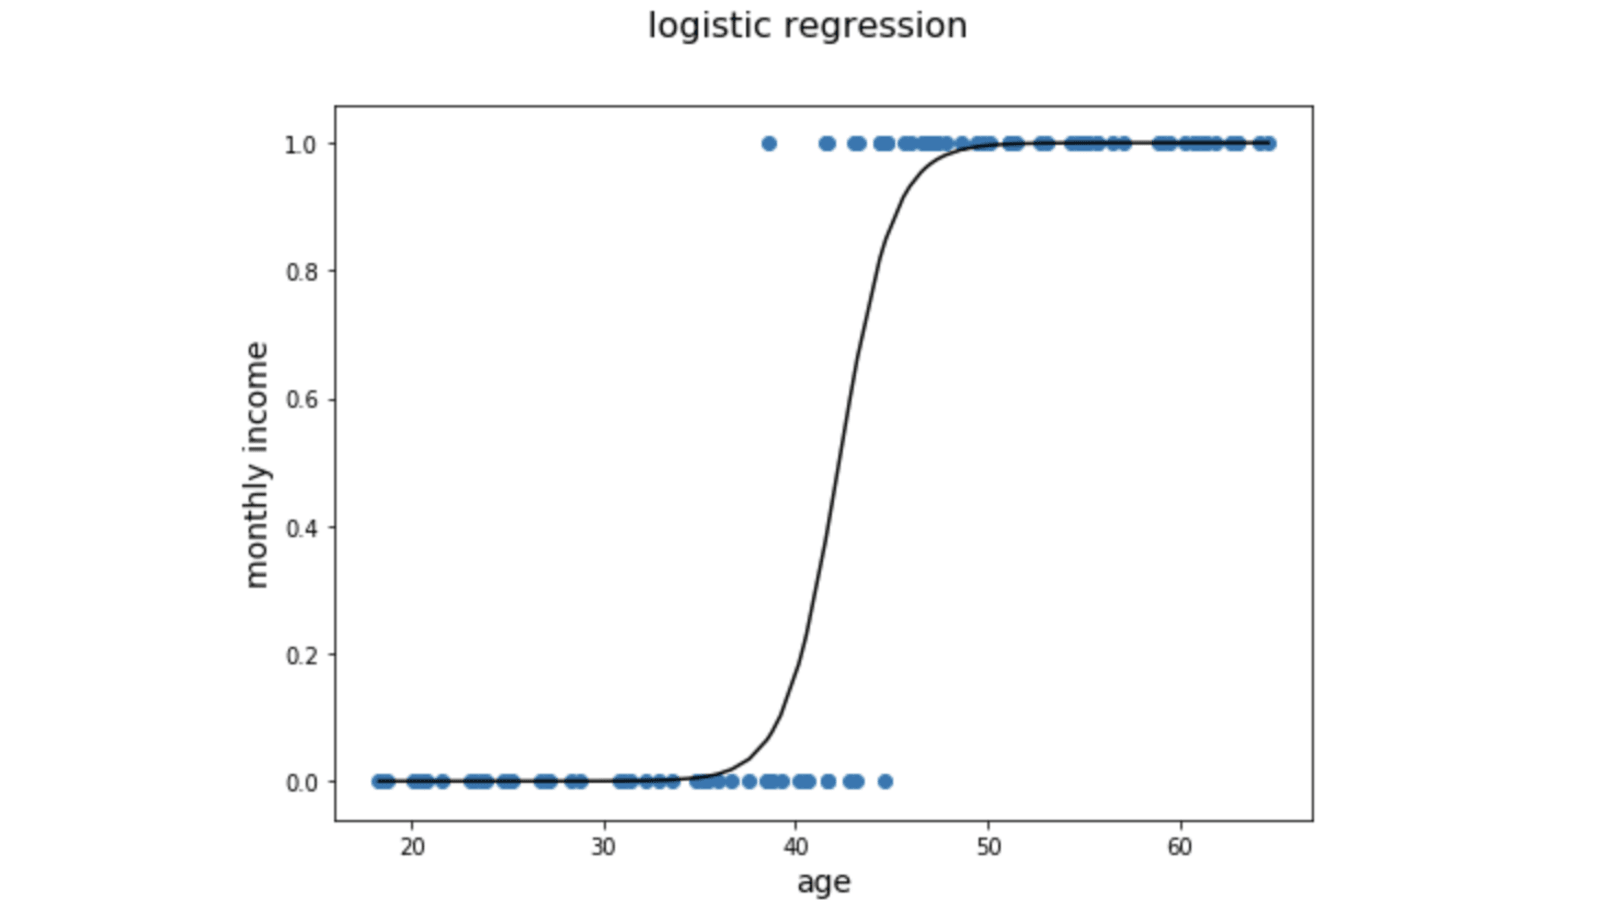

In [195]:
#creates a Logistic Regression model
model = LogisticRegression()

## Hyperparameter Tuning

What is a hyperparameter?
Hyperparameters are the parameters that controls the learning process the model goes through. Tuning these parameters can increase or decrease the score of the model.

In [196]:
#creating a dictionary called param_grid
#this dictionary contains multiple different values for each specific parameter of the model
param_grid = {
    'C': range(1, 10)
}

#GrideSearchCV quickly runs through all the different combinations of parameters
grid = GridSearchCV(model, param_grid, cv=5, refit = True, verbose = 3, scoring='accuracy')

#fitting the model for grid search
grid.fit(xt, yt)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ...............................C=1;, score=0.600 total time=   0.0s
[CV 2/5] END ...............................C=1;, score=0.800 total time=   0.0s
[CV 3/5] END ...............................C=1;, score=0.720 total time=   0.0s
[CV 4/5] END ...............................C=1;, score=0.708 total time=   0.0s
[CV 5/5] END ...............................C=1;, score=0.708 total time=   0.0s
[CV 1/5] END ...............................C=2;, score=0.640 total time=   0.0s
[CV 2/5] END ...............................C=2;, score=0.800 total time=   0.0s
[CV 3/5] END ...............................C=2;, score=0.720 total time=   0.0s
[CV 4/5] END ...............................C=2;, score=0.708 total time=   0.0s
[CV 5/5] END ...............................C=2;, score=0.750 total time=   0.0s
[CV 1/5] END ...............................C=3;, score=0.640 total time=   0.0s
[CV 2/5] END ...............................C=3;,

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': range(1, 10)}, scoring='accuracy', verbose=3)

In [197]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 3}
LogisticRegression(C=3)


## Train our final model using our full Training Dataset

In [198]:
#makes the Logistic Regression model with the best hyperparameters
model = grid.best_estimator_

#trains the model with the data
model.fit(x_train, y_train)
y_test_pred = grid.predict(x_test)

In [199]:
#creates test_set_correctly_classified and test_set_accuracy
#test_set_correctly_classified stores whether the predicted value is correct
#test_set_accuracy stores the mean score of all the correct and incorrect values

test_set_correctly_classified = y_test_pred == y_test
logistic_regression_test_set_accuracy = np.mean(test_set_correctly_classified)

## **Logistic Regression: Final Score**

In [200]:
#prints the accuracy of the model
print(f'Test set accuracy: {logistic_regression_test_set_accuracy * 100:.2f}%')

Test set accuracy: 73.81%


We will be using the Logistic Regression model as our baseline as it is our first model we decided to use. Let's see if we can get a higher accuracy with our next model, the Decision Tree.

# Modeling - Decision Tree

## What is a decision tree model?
A decision tree uses regression to obtain a classification through simple decisions (yes or no type questions).

Documentation: https://en.wikipedia.org/wiki/Decision_tree

Image:

![decisiontree](https://i0.wp.com/why-change.com/wp-content/uploads/2021/11/Decision-Tree-elements-2.png?resize=715%2C450&ssl=1)

In [201]:
#creates a Decision Tree model
model = DecisionTreeClassifier()

## Hyperparameter Tuning

In [202]:
#creating a dictionary called param_grid
#this dictionary contains multiple different values for each specific parameter of the model
params_grid = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_leaf_nodes':[10, 20, 30, 40, 50],
    'criterion': ["gini", "entropy"]
}

#GrideSearchCV quickly runs through all the different combinations of parameters
grid = GridSearchCV(model, params_grid, refit = True, verbose = 3, scoring='accuracy')

# fitting the model for grid search
grid.fit(xt, yt)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits
[CV 1/5] END criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5;, score=0.680 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5;, score=0.560 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5;, score=0.760 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5;, score=0.708 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5;, score=0.708 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=10;, score=0.760 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=10;, score=0.560 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=10;, score=0.760 total time=   0.0s
[CV 4/5] END criterion=gini, 

[CV 1/5] END criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=20;, score=0.680 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=20;, score=0.760 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=20;, score=0.800 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=20;, score=0.750 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=20;, score=0.667 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=50;, score=0.560 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=50;, score=0.560 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=50;, score=0.560 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_leaf_n

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'max_leaf_nodes': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=3)

In [203]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 10}
DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=10,
                       min_samples_leaf=10)


## Train our final model using our full Training Dataset

In [204]:
#makes the Decision Tree model with the best hyperparameters
model = grid.best_estimator_

#trains the model with the data
model.fit(x_train, y_train)
y_test_pred = grid.predict(x_test)

In [205]:
#creates test_set_correctly_classified and test_set_accuracy
#test_set_correctly_classified stores whether the predicted value is correct
#test_set_accuracy stores the mean score of all the correct and incorrect values

test_set_correctly_classified = y_test_pred == y_test
decision_tree_test_set_accuracy = np.mean(test_set_correctly_classified)

## **Decision Tree: Final Score**

In [206]:
print(f'Test set accuracy: {decision_tree_test_set_accuracy * 100:.2f}%')

Test set accuracy: 85.71%


After running the model with different training and test sets (by running the whole program), we can see that the Decision Tree model tends to do better compared to the Logistic Regression model. However, the next model, Random Forest, is like the big brother of the Decision Tree. Let's see how much better it can do compare to the Decision Tree.

# Modeling - Random Forest

## What is a random forest?
A random forest model is a more extreme version of the decision tree model as it makes multiple decision trees and picks from the majority.

Documentation: https://en.wikipedia.org/wiki/Random_forest

Image:

![randomforest](https://serokell.io/files/vz/vz1f8191.Ensemble-of-decision-trees.png)

In [207]:
#creates a Random Forest model
model = RandomForestClassifier()

## Hyperparamter Tuning
I have created two sets of parameters, one takes significantly longer to run compared to the other however it may lead to better results.

In [208]:
#creating a dictionary called param_grid
#this dictionary contains multiple different values for each specific parameter of the model

#run time: long
# param_grid = {
#     'n_estimators': [200, 500],
#     'max_depth' : [4,5,6,7,8],
#     'min_samples_split':[10, 20, 30, 40, 50],
#     'min_samples_leaf': [10, 20, 30, 40, 50],
#     'criterion' :['gini', 'entropy']
# }

#OR

#run time short
param_grid = {
    'n_estimators': [200, 500],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

#GrideSearchCV quickly runs through all the different combinations of parameters
grid = GridSearchCV(model, param_grid, refit = True, verbose = 3, scoring='accuracy')

# fitting the model for grid search
grid.fit(xt, yt)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END criterion=gini, max_depth=4, n_estimators=200;, score=0.800 total time=   0.1s


[CV 2/5] END criterion=gini, max_depth=4, n_estimators=200;, score=0.800 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, n_estimators=200;, score=0.800 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, n_estimators=200;, score=0.792 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, n_estimators=200;, score=0.833 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, n_estimators=500;, score=0.760 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=4, n_estimators=500;, score=0.800 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=4, n_estimators=500;, score=0.800 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=4, n_estimators=500;, score=0.792 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=4, n_estimators=500;, score=0.917 total time=   0.6s
[CV 1/5] END criterion=gini, max_depth=5, n_estimators=200;, score=0.720 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=5, n_estimators=200;, score=0.840 total t

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [200, 500]},
             scoring='accuracy', verbose=3)

In [209]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 200}
RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=200)


## Train our final model using our full Training Dataset

In [210]:
#makes the Random Forest model with the best hyperparameters
model = grid.best_estimator_

#trains the model with the data
model.fit(x_train, y_train)
y_test_pred = grid.predict(x_test)

In [211]:
#creates test_set_correctly_classified and test_set_accuracy
#test_set_correctly_classified stores whether the predicted value is correct
#test_set_accuracy stores the mean score of all the correct and incorrect values

test_set_correctly_classified = y_test_pred == y_test
random_forest_test_set_accuracy = np.mean(test_set_correctly_classified)

## Random Forest: Final Score

In [212]:
print(f'Test set accuracy: {random_forest_test_set_accuracy * 100:.2f}%')

Test set accuracy: 80.95%


After running the model with different training and test sets (by running the whole program), we can see that the Random Forest model tends to do better than the Decision Tree model and significantly better than the Logistic Regression model. The next model, Support Vector Machines, is very complicated so we should expect it to do as good or even better compared to the Random Forest model.

# Modeling - Support Vector Classifier

## What is Support Vector Classifier (SVC)?

Support Vector Classifier are more accurate compared to other regressions like logistic regression and decision trees. This model uses very specific and accurate lines to differentiate one class from another.

Documentation: https://en.wikipedia.org/wiki/Support_vector_machine

Image:

![SVM](https://miro.medium.com/v2/resize:fit:600/format:webp/0*9jEWNXTAao7phK-5.png)

In [232]:
#creates a Support Vector Classifier model 
model = SVC()

## Hyperparameter Tuning

In [214]:
#creating a dictionary called param_grid
#this dictionary contains multiple different values for each specific parameter of the model
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

#GrideSearchCV quickly runs through all the different combinations of parameters
grid = GridSearchCV(model, param_grid, refit = True, verbose = 3, scoring='accuracy')

# fitting the model for grid search
grid.fit(xt, yt)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.560 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.560 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.560 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.542 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.583 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.560 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.560 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.560 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.542 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.583 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.560 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [215]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


## Train our final model using our full Training Dataset

In [216]:
#makes the Support Vector Classifier model with the best hyperparameters
model = grid.best_estimator_

#trains the model with the data
model.fit(x_train, y_train)
y_test_pred = grid.predict(x_test)

In [217]:
#creates test_set_correctly_classified and test_set_accuracy
#test_set_correctly_classified stores whether the predicted value is correct
#test_set_accuracy stores the mean score of all the correct and incorrect values

test_set_correctly_classified = y_test_pred == y_test
svc_test_set_accuracy = np.mean(test_set_correctly_classified)

## Support Vector Classifier: Final Score

In [218]:
print(f'Test set accuracy: {svc_test_set_accuracy * 100:.2f}%')

Test set accuracy: 80.95%


After running the model with different training and test sets (by running the whole program), we can see that the Support Vector Classifier model is about on par with the Random Forest model. Let's see if our final model can do even better than all the other models.

# Modeling - K-Nearest Neighbors

## What is K-Nearest Neighbors?
This model uses neighboring points from the training sets to determine each specific point in the validationa and test sets. As demonstrated by the image below.

Documentation: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

Image:

![kNN](https://miro.medium.com/v2/resize:fit:1200/1*T8Pnw0kiVbrPGnqnB2I_Zw.jpeg)

In [219]:
#creates a K-Nearest Neighbors model
model = KNeighborsClassifier()

## Hyperparamter Tuning

In [220]:
#creating a dictionary called param_grid
#this dictionary contains multiple different values for each specific parameter of the model
param_grid = {'n_neighbors': [1, 5, 10, 25],
              'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
              'n_jobs': [1, 2, 3, 4, 5]}

#GrideSearchCV quickly runs through all the different combinations of parameters
grid = GridSearchCV(model, param_grid, refit = True, verbose = 3, scoring='accuracy')

# fitting the model for grid search
grid.fit(xt, yt)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END algorithm=ball_tree, n_jobs=1, n_neighbors=1;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_jobs=1, n_neighbors=1;, score=0.720 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_jobs=1, n_neighbors=1;, score=0.800 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_jobs=1, n_neighbors=1;, score=0.750 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_jobs=1, n_neighbors=1;, score=0.792 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_jobs=1, n_neighbors=5;, score=0.640 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_jobs=1, n_neighbors=5;, score=0.720 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_jobs=1, n_neighbors=5;, score=0.760 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_jobs=1, n_neighbors=5;, score=0.625 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_jobs=1, n_neighbors=5;, score=0.708 total time=   0.0s
[CV 1/5] END algorithm=ball_

[CV 3/5] END algorithm=ball_tree, n_jobs=3, n_neighbors=10;, score=0.680 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_jobs=3, n_neighbors=10;, score=0.708 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_jobs=3, n_neighbors=10;, score=0.750 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_jobs=3, n_neighbors=25;, score=0.680 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_jobs=3, n_neighbors=25;, score=0.680 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_jobs=3, n_neighbors=25;, score=0.680 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_jobs=3, n_neighbors=25;, score=0.583 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_jobs=3, n_neighbors=25;, score=0.667 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_jobs=4, n_neighbors=1;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_jobs=4, n_neighbors=1;, score=0.720 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_jobs=4, n_neighbors=1;, score=0.800 total time

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
                         'n_jobs': [1, 2, 3, 4, 5],
                         'n_neighbors': [1, 5, 10, 25]},
             scoring='accuracy', verbose=3)

In [221]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'algorithm': 'ball_tree', 'n_jobs': 1, 'n_neighbors': 1}
KNeighborsClassifier(algorithm='ball_tree', n_jobs=1, n_neighbors=1)


## Train our final model using our full Training Dataset

In [222]:
#makes the K-Nearest Neighbors model with the best hyperparameters
model = grid.best_estimator_

#trains the model with the data
model.fit(x_train, y_train)
y_test_pred = grid.predict(x_test)

In [223]:
#creates test_set_correctly_classified and test_set_accuracy
#test_set_correctly_classified stores whether the predicted value is correct
#test_set_accuracy stores the mean score of all the correct and incorrect values

test_set_correctly_classified = y_test_pred == y_test
k_nearest_neighbors_test_set_accuracy = np.mean(test_set_correctly_classified)

## K-Nearest Neighbors: Final Score

In [224]:
print(f'Test set accuracy: {k_nearest_neighbors_test_set_accuracy * 100:.2f}%')

Test set accuracy: 83.33%


After running the model with different training and test sets (by running the whole program), we can see that the K-Nearest Neighbors model is about on par with the Support Vector Classifier and Random Forest models.

# Model Comparison

### Logistic Regression Accuracy

In [231]:
#prints the accuracy of the model
print(f'''Logistic Regression Accuracy: {logistic_regression_test_set_accuracy * 100:.2f}%
Decision Tree Accuracy: {decision_tree_test_set_accuracy * 100:.2f}%
Random Forest Accuracy: {random_forest_test_set_accuracy * 100:.2f}%
Support Vector Classifier Accuracy: {svc_test_set_accuracy * 100:.2f}%
K-Nearest Neighbors Accuracy: {k_nearest_neighbors_test_set_accuracy * 100:.2f}%''')

Logistic Regression Accuracy: 73.81%
Decision Tree Accuracy: 85.71%
Random Forest Accuracy: 80.95%
Support Vector Classifier Accuracy: 80.95%
K-Nearest Neighbors Accuracy: 83.33%


We can see that Support Vector Classifier, Random Forest, and K-Nearest Neighbors models tend to do better compared to the Decision Tree and Logistic Regression models.

# Conclusion

## Best Models
The best models for this dataset are Random Forest, Support Vector Classifier, and K-Nearest Neighbors. This makes sense as they are significantly more complex meaning the accuracy will most likely increase as the complexity increases.

## Next Steps
With machine learning models, there are hyperparameters that you can tune, as I stated above. Find a way to tune these hyperparameters more efficiently and accurately to produce the highest accuracy. I have provided an example of how to tune some of the hyperparameters but there are more ways that you can discover.